# Results

As always, load our dataset first

In [1]:
%run mylib.py
(data, X, y)=loadXy(verbose=False)

## Build a DummyClassifier as baseline

In order to create a baseline, let's fit a Dummy Classifier. Nothing very difficult here.

In [2]:
import numpy as np
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X['trainX'], y['trainX'])

dummy_clf.predict(X['test'])

accuracy=dummy_clf.score(X['test'], y['test'])

print("Dummy classifier accuracy: {:.1f}%".format(accuracy*100))


Dummy classifier accuracy: 23.5%


Save this dummy model on disk to simplify the code below.

In [3]:
saveModel(dummy_clf, 'dummy')

Saving model dummy to model-dummy.sav using 'pickle' library


## Load models from disk, evaluate them and display accuracy

The work here is very basic.

Based on a list of model name, I load the corresponding models from disk using the *loadModel()* function.

Then, I do apply the *score()* method on each model, and store the result in an array.

    Note: There is little trick in this code using *try/except* approach, as the *score()* method is not available on *Keras* models. On top of that, the parameters we pass to Dense neural network and the Convulution one are different.
    That's not very clean, but it works ;-)


In [4]:

model_list=['dummy', 'knn', 'decision-tree', 'logistic', 'random-forest', 'svm-linear', 'svm-rbf', '1-layer-nn', '2-layer-nn', 'cnn']
models_score=[]

for i in model_list:
    model=loadModel(i)
    try:
        accuracy=model.score(X['test'], y['test'])
    except:
        try:
            # This is for cnn Conv Network
            accuracy=model.evaluate(data['test']['data'], data['test']['labels'])[1]
        except:
            # This is for 1-nn and 2-nn layer Dense network
            (loss, accuracy)=model.evaluate(X['test'], y['test'], batch_size=16)
    finally:
        accuracy=accuracy*100
    print("  {} - Accuracy on test dataset: {:.1f}%\n".format(i, accuracy))
    models_score.append([i, accuracy])
    


Loading model from  model-dummy.sav
Model loaded using pickle()
  dummy - Accuracy on test dataset: 23.5%

Loading model from  model-knn.sav
Model loaded using pickle()
  knn - Accuracy on test dataset: 92.2%

Loading model from  model-decision-tree.sav
Model loaded using pickle()
  decision-tree - Accuracy on test dataset: 88.2%

Loading model from  model-logistic.sav
Model loaded using pickle()
  logistic - Accuracy on test dataset: 96.1%

Loading model from  model-random-forest.sav
Model loaded using pickle()
  random-forest - Accuracy on test dataset: 92.2%

Loading model from  model-svm-linear.sav
Model loaded using pickle()
  svm-linear - Accuracy on test dataset: 96.1%

Loading model from  model-svm-rbf.sav
Model loaded using pickle()
  svm-rbf - Accuracy on test dataset: 96.1%

Loading model from  model-1-layer-nn.sav
Model loaded using keras.models.load_model()
51/51 [==============================] - 0s 2ms/step
  1-layer-nn - Accuracy on test dataset: 94.1%

Loading model fr

## Display results


### As a Panda DataFrame

The most dimple representation is using Panda dataframe, based on the array of results ansd the list of models name.

In [5]:
import pandas as pd

compare_df=pd.DataFrame(models_score, columns=['Model', 'Score'])

compare_df['Score %']=compare_df['Score'].apply(lambda x:  '{:.2f}%'.format(x))

compare_df[['Model', 'Score %']]



,Model,Score %
0,dummy,23.53%
1,knn,92.16%
2,decision-tree,88.24%
3,logistic,96.08%
4,random-forest,92.16%
5,svm-linear,96.08%
6,svm-rbf,96.08%
7,1-layer-nn,94.12%
8,2-layer-nn,92.16%
9,cnn,50.98%


### As a bar graph

Again, very simple code here to display scores in a grsaphical way

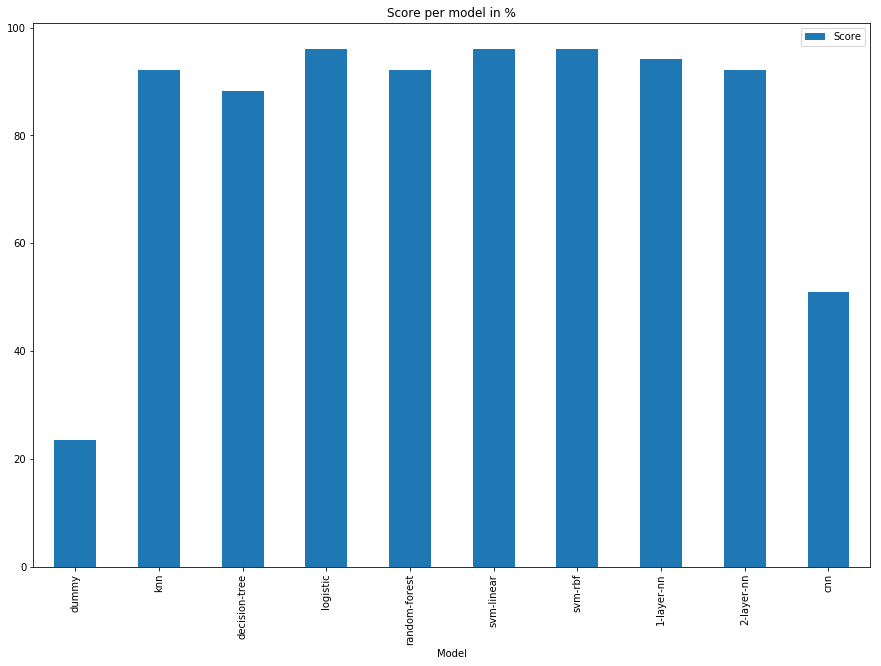

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

compare_df[['Model', 'Score']].plot.bar(x='Model', figsize=(15,10))
plt.title("Score per model in %")

plt.show()

## And what about scors with my own *High Features Level* ?

Just for fun, let's compute scores using my own *high level features* built in the previous Notebook.

To proceed, I will:

1. Load my Conv Network from disk
2. Build my *HLF* from it
3. Evaluate against them all the models I have

    Note: There is no sense to evaluate my Conv Network with my high level features, as this this model workd on the original data (the pictures) to build the *high level features*. For that reason, we do apply the *evaluate()* function on the same dataset as above, scores will be identical.

In [7]:
X_te=np.float32(data['test']['data'])
y_te=data['test']['labels']

cnn_model=loadModel('cnn')
feature_extractor = keras.Model(
   inputs=cnn_model.inputs,
   outputs=cnn_model.get_layer(name="high-level-features").output,
)

features = feature_extractor.predict(X_te)

Loading model from  model-cnn.sav
Model loaded using keras.models.load_model()


In [8]:

model_list=['dummy', 'knn', 'decision-tree', 'logistic', 'random-forest', 'svm-linear', 'svm-rbf', '1-layer-nn', '2-layer-nn', 'cnn']
models_score_with_my_hlf=[]

for i in model_list:
    model=loadModel(i)
    try:
        accuracy=model.score(features, y_te)
    except:
        try:
            # This is for cnn Conv Network
            accuracy=model.evaluate(data['test']['data'], data['test']['labels'])[1]
        except:
            # This is for 1-nn and 2-nn layer Dense network
            (loss, accuracy)=model.evaluate(features, y_te, batch_size=16)
    finally:
        accuracy=accuracy*100
    print("  {} - Accuracy on test dataset: {:.1f}%\n".format(i, accuracy))
    models_score_with_my_hlf.append([i, accuracy])
    



Loading model from  model-dummy.sav
Model loaded using pickle()
  dummy - Accuracy on test dataset: 23.5%

Loading model from  model-knn.sav
Model loaded using pickle()
  knn - Accuracy on test dataset: 15.7%

Loading model from  model-decision-tree.sav
Model loaded using pickle()
  decision-tree - Accuracy on test dataset: 21.6%

Loading model from  model-logistic.sav
Model loaded using pickle()
  logistic - Accuracy on test dataset: 11.8%

Loading model from  model-random-forest.sav
Model loaded using pickle()
  random-forest - Accuracy on test dataset: 19.6%

Loading model from  model-svm-linear.sav
Model loaded using pickle()
  svm-linear - Accuracy on test dataset: 11.8%

Loading model from  model-svm-rbf.sav
Model loaded using pickle()
  svm-rbf - Accuracy on test dataset: 11.8%

Loading model from  model-1-layer-nn.sav
Model loaded using keras.models.load_model()
51/51 [==============================] - 0s 4ms/step
  1-layer-nn - Accuracy on test dataset: 17.6%

Loading model fr

Let's build a bar graph with both results, the one using *High Level Features* from *Inception V3*, the other with my own.

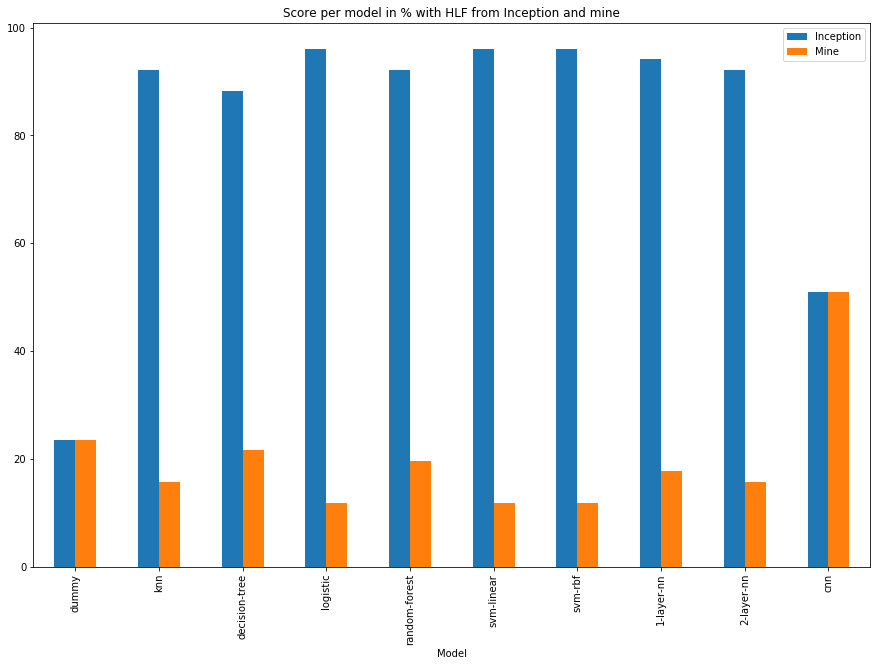

In [18]:


compare_df=pd.DataFrame( {
    'Model': model_list,
    'Inception': np.array(models_score)[:,1].astype(np.float),
    'Mine': np.array(models_score_with_my_hlf)[:,1].astype(np.float)
})

compare_df.plot.bar(x='Model', figsize=(15,10))
plt.title("Score per model in % with HLF from Inception and mine")

plt.show()




## Conclusion

As we can see on this previoius graphs, all the models based on the *Inception v3* *High Level Features* do perform extremly well, logistic and SVM being the one that seems to perform best.

Result from a home made Convolutional neural network are poor compared to the previous one (around 50% for the Conv Net against 98% for logistic).

And what's interesting, if I use home made *High Level Features* on the different models, then the result is very, very bad.

This demonstrate that the size and accuracy of the dataset used to train models is one of the main key factor to get good predictions.

# That's all Folks :-)